In [36]:
# Importing needed libraries into the workspace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [37]:
# Loading the dataset
df = pd.read_csv('HistoricalQuotes.csv')

In [38]:
# Data Preprocessing
df['Close'] = df[' Close/Last'].str.replace('$', '').astype(float) # Converting 'Close/Last' to float
df = df[['Close']]  # Focus only on the 'Close' price column

In [39]:
# Normalizing the data
scaler = MinMaxScaler(feature_range=(0, 1))
df['Close'] = scaler.fit_transform(df[['Close']])

In [40]:
# Splitting into training and testing datasets
split_fraction = 0.8
split_index = int(len(df) * split_fraction)
train_data = df[:split_index].values
test_data = df[split_index:].values

In [41]:
print("Shape of train data:", train_data.shape)
print("Shape of test data:", test_data.shape)

Shape of train data: (2014, 1)
Shape of test data: (504, 1)


In [42]:
# Creating sequences for RNN
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length):
        seq = data[i:i + sequence_length]
        label = data[i + sequence_length]
        sequences.append((seq, label))
    return sequences

In [43]:
sequence_length = 60
train_sequences = create_sequences(train_data, sequence_length)
test_sequences = create_sequences(test_data, sequence_length)

X_train = np.array([seq[0] for seq in train_sequences])
y_train = np.array([seq[1] for seq in train_sequences])
X_test = np.array([seq[0] for seq in test_sequences])
y_test = np.array([seq[1] for seq in test_sequences])

In [44]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1954, 60, 1)
Shape of y_train: (1954, 1)


In [45]:
# Reshaping for RNN input (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [46]:
# Building the RNN Model
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Model training
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0613 - val_loss: 2.4087e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.0218e-04 - val_loss: 1.5125e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 8.7945e-05 - val_loss: 8.0231e-05
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 1.1093e-04 - val_loss: 1.5415e-04
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 9.2485e-05 - val_loss: 1.6372e-04
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 8.4313e-05 - val_loss: 1.3056e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.6584e-05 - val_loss: 1.3098e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.4450e-05 - val_loss: 9.1973e-05
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 7.2079e-05 - val_loss: 7.3682e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 7.5646e-05 - val_loss: 4.5987e-05
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 8.4281e-05 - 

In [48]:
# Making predictions
predictions = model.predict(X_test)
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


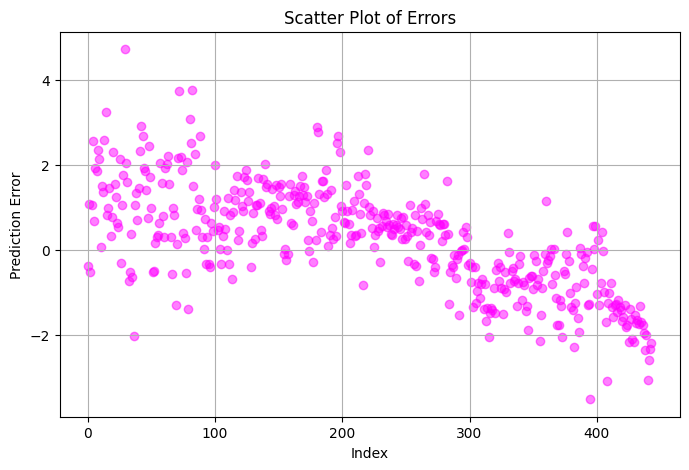

In [49]:
# Calculating and plotting errors
errors = y_test_rescaled - predictions_rescaled
plt.figure(figsize=(8, 5))
plt.scatter(range(len(errors)), errors, alpha=0.5, color='magenta')
plt.title('Scatter Plot of Errors')
plt.xlabel('Index')
plt.ylabel('Prediction Error')
plt.grid(True)
plt.show()

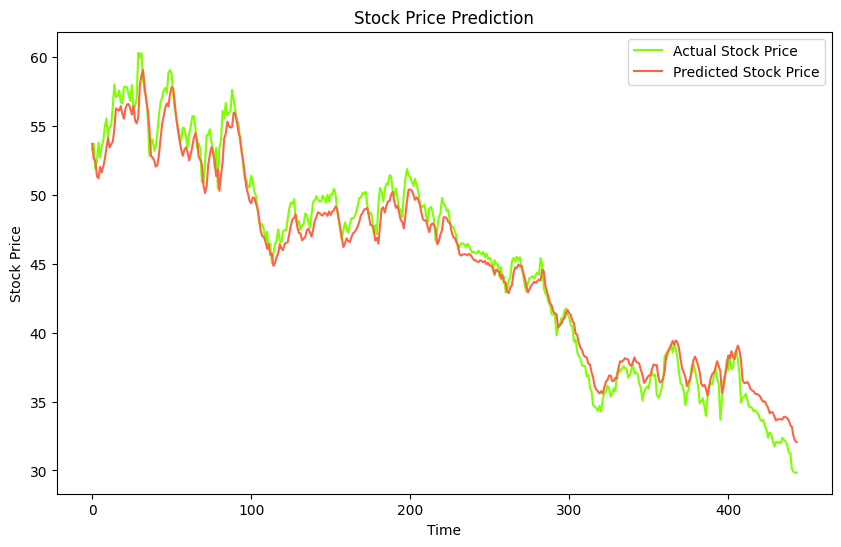

In [50]:
# Plotting predicted vs. actual stock prices
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, color='chartreuse', label='Actual Stock Price')
plt.plot(predictions_rescaled, color='tomato', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [51]:
# Model evaluation
mae = mean_absolute_error(y_test_rescaled, predictions_rescaled)
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 1.032071983433629
Root Mean Squared Error (RMSE): 1.26665034133237


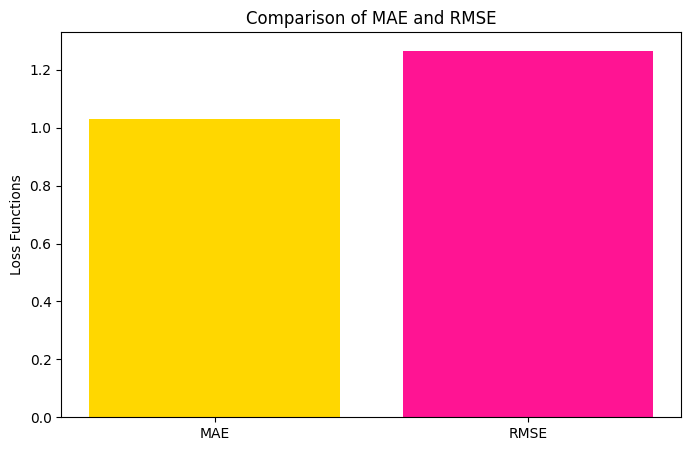

In [52]:
# Bar plot for MAE and MSE
plt.figure(figsize=(8, 5))
plt.bar(['MAE', 'RMSE'], [mae, rmse], color=['gold', 'deeppink'])
plt.title('Comparison of MAE and RMSE')
plt.ylabel('Loss Functions')
plt.show()

## **Report: Stock Price Prediction Using RNN**

#### **Objective:**
The goal was to predict stock prices based on historical data using a simple Recurrent Neural Network (RNN). The dataset consisted of daily closing prices, and a sequence length of 60 days was used to forecast the next day's closing price.

#### **Data Preprocessing:**
The 'Close' prices were extracted and normalized using Min-Max scaling to ensure all values were between 0 and 1. The dataset was split into an 80% training set and a 20% testing set.

#### **Model Architecture:**
The RNN model had one SimpleRNN layer with 50 units followed by a Dense output layer. The model was compiled with the mean squared error (MSE) loss function and the Adam optimizer, and trained over 50 epochs with a batch size of 32.

#### **Results and Evaluation:**
The model’s performance was evaluated using Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). The actual vs. predicted prices plot indicates how well the model captured the overall trend, though there were deviations due to noise in stock price data. The final MAE was 1.0321 and RMSE was 1.2666. This low MAE suggests that the model is consistently making small errors, which is particularly impressive given the stock price range of roughly 30 to 60. Additionally, as RMSE penalizes larger errors more heavily, a low RMSE value indicates that there are no significant prediction outliers. The small difference between MAE and RMSE, as one can see from the bar plot, also suggests that the errors are evenly distributed without large deviations, implying steady and reliable performance across the entire dataset.

#### **Observations and Limitations:**
While the model captured general trends, stock prices exhibit high volatility, and simple RNNs can be limited in capturing long-term dependencies. The lack of external features (e.g., volume, market indicators) further limited prediction accuracy. Enhancements using more complex architectures (e.g., LSTM, GRU) and additional data could improve performance.

#### **Visual Analysis:**
The prediction model shows a quite strong alignment with actual stock prices over time. The predicted prices almost follow the actual stock price movements, demonstrating the model’s effectiveness in capturing both upward and downward trends. The low MAE and RMSE values reflect high prediction accuracy and a minimal deviation from actual values. The model not only follows the overall direction but also manages to capture some minor fluctuations in stock prices, indicating that it can account for short-term volatility. This feature is crucial for stock price prediction, where market prices can fluctuate significantly over brief periods.